# 聚类

## 不同聚类算法

### K-Means聚类

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

In [3]:
X,y=make_blobs(n_samples=1000, n_features=2,centers=[[-1,-1],[0,0],[1,1],[2,2]],cluster_std=[0.4,0.2,0.2,0.2],random_state=6)

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

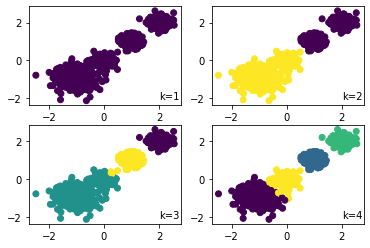

In [6]:
for index,k in enumerate((1,2,3,4)):
    plt.subplot(2,2,index+1)
    y_pred=KMeans(n_clusters=k,random_state=6).fit_predict(X)
    plt.scatter(X[:,0],X[:,1],c=y_pred)
    plt.text(0.99,0.06,"k=%d" %k,
             transform=plt.gca().transAxes,
             horizontalalignment="right")
    
plt.show()

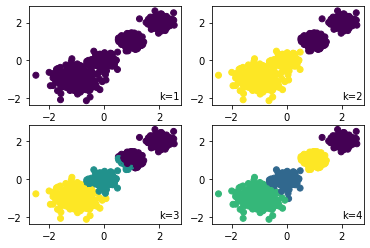

In [7]:
from sklearn.cluster import MiniBatchKMeans
for index,k in enumerate((1,2,3,4)):
    plt.subplot(2,2,index+1)
    y_pred=MiniBatchKMeans(n_clusters=k,random_state=6).fit_predict(X)
    plt.scatter(X[:,0],X[:,1],c=y_pred)
    plt.text(0.99,0.06,"k=%d" %k,transform=plt.gca().transAxes,horizontalalignment="right")    
plt.show()

### 层次聚类(AgglomerativeClustering）算法

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll

In [9]:
# 生成数据集 (swiss roll dataset)
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# 将它变瘦一点
X[:, 1] *= .5

In [10]:
# 训练
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X)
label = ward.labels_
print("Number of points: %i" % label.size)

Number of points: 1500


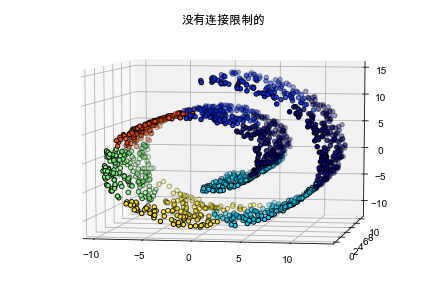

In [11]:
#plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 可视化
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=plt.cm.jet(np.float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.title("没有连接限制的")
plt.show()

In [12]:
# 定义一个数据结构A，这里有10个最近的邻居
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

In [13]:
# 训练
ward = AgglomerativeClustering(n_clusters=6, connectivity=connectivity,
                               linkage='ward').fit(X)
label = ward.labels_
print("Number of points: %i" % label.size)

Number of points: 1500


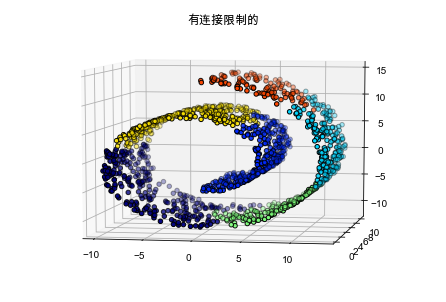

In [14]:
# 可视化
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.title('有连接限制的')
plt.show()

### 密度聚类(DBSCAN）

In [15]:
#生成两个混合数据集
centers=[[1.4,1],[-1.4,-1],[1.2,-1]]
X1,y1=make_blobs(n_samples=600, n_features=2,centers=centers,cluster_std=0.1,random_state=0)

from  sklearn import datasets
X2,y2=datasets.make_circles(n_samples=6000,factor=0.6,noise=0.05)

In [16]:
X=np.concatenate((X1,X2))

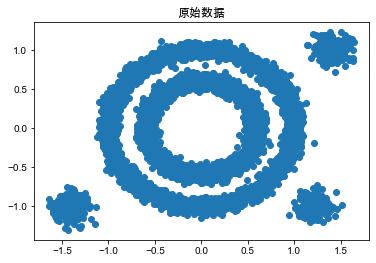

In [17]:
#plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

plt.title("原始数据")
plt.scatter(X[:,0],X[:,1],marker="o")
plt.show()

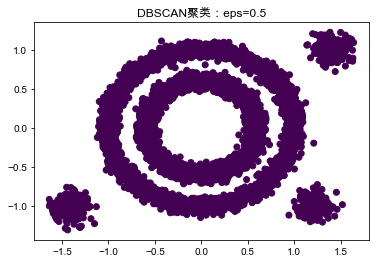

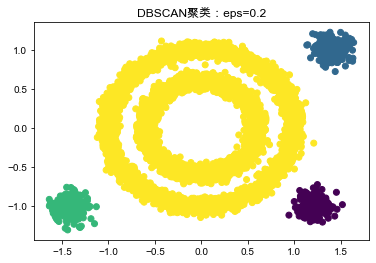

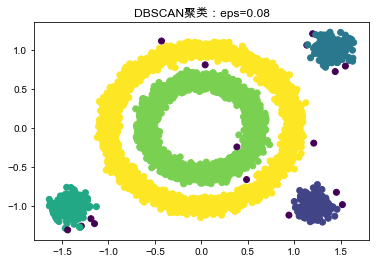

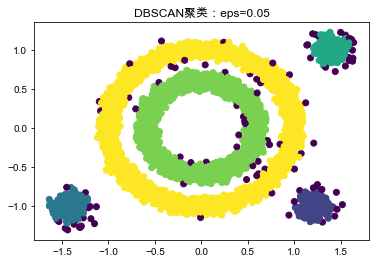

In [18]:
#应用密度聚类
from sklearn.cluster import DBSCAN
eps_list=[0.5,0.2,0.08,0.05]  #eps分别取不同的值，其他参数值一样
for eps in eps_list:
    y_pred=DBSCAN(eps=eps).fit_predict(X)
    plt.title("DBSCAN聚类：eps=%s" %eps)
    plt.scatter(X[:,0],X[:,1],c=y_pred)
    plt.show()